In [44]:
import os
import warnings
import pandas as pd
import refinitiv.data as rd
from datetime import datetime, timedelta

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set Pandas option for future behavior (optional)
pd.set_option('future.no_silent_downcasting', True)

# Open session and fetch data
app_key = os.getenv("REFINITIV_APP_KEY")
rd.open_session(rd.SessionType.Cloud, app_key=app_key)
data = rd.get_data("DBKGn.DE", ["BID", "ASK", "LAST"])
print(data)


  Instrument   BID   ASK  LAST
0   DBKGn.DE  <NA>  <NA>  <NA>


In [27]:
# Define date range
end_date = datetime.now()
start_date = end_date - timedelta(days=365)

# Fetch data with adjusted fields
df = rd.get_history(
    universe='DBKGn.DE',
    fields=['TRDPRC_1', 'TRNOVR_UNS'],  # Adjusted fields
    start=start_date.strftime('%Y-%m-%d'),
    end=end_date.strftime('%Y-%m-%d'),
    interval='daily'
)

# Check if data is available
if not df.empty:
    print("Data fetched successfully!")
    print(df.head())
else:
    print("No data returned. Verify fields or instrument.")

# Close session
rd.close_session()


Data fetched successfully!
DBKGn.DE    TRDPRC_1     TRNOVR_UNS
Date                               
2024-02-07      <NA>  208884097.138
2024-02-08      <NA>   84433876.912
2024-02-09      <NA>   79407915.338
2024-02-12      <NA>    63431626.64
2024-02-13      <NA>   76199422.984


In [29]:
# Open session and fetch data
rd.open_session(app_key='cb64a413a4f04804b8a6a82bde9c35087f7f819c')
df = rd.get_history(
    universe='DBKGn.DE',
    fields=['CLOSE_ADJ', 'VWAP'],  # Adjusted Close and Volume Weighted Average Price
    start=start_date.strftime('%Y-%m-%d'),
    end=end_date.strftime('%Y-%m-%d'),
    interval='daily'
)
print(df)


DBKGn.DE    CLOSE_ADJ     VWAP
Date                          
2024-02-07       <NA>  11.8045
2024-02-08       <NA>  11.6674
2024-02-09       <NA>   11.602
2024-02-12       <NA>  11.8276
2024-02-13       <NA>  11.8903
...               ...      ...
2025-01-29       <NA>  19.4805
2025-01-30       <NA>   18.747
2025-01-31       <NA>  18.9754
2025-02-03       <NA>  18.3646
2025-02-04       <NA>  18.1853

[252 rows x 2 columns]


In [30]:
data = rd.get_data(
    universe="DBKGn.DE",
    fields=["TRDPRC_1", "BID", "ASK", "VOLUME"]
)
print(data)


  Instrument  TRDPRC_1   BID   ASK  VOLUME
0   DBKGn.DE      <NA>  <NA>  <NA>    <NA>


In [32]:
print(df.head())  # Display the first few rows of the DataFrame
print(df.columns)  # Check the column names


DBKGn.DE    CLOSE_ADJ     VWAP
Date                          
2024-02-07       <NA>  11.8045
2024-02-08       <NA>  11.6674
2024-02-09       <NA>   11.602
2024-02-12       <NA>  11.8276
2024-02-13       <NA>  11.8903
Index(['CLOSE_ADJ', 'VWAP'], dtype='object', name='DBKGn.DE')


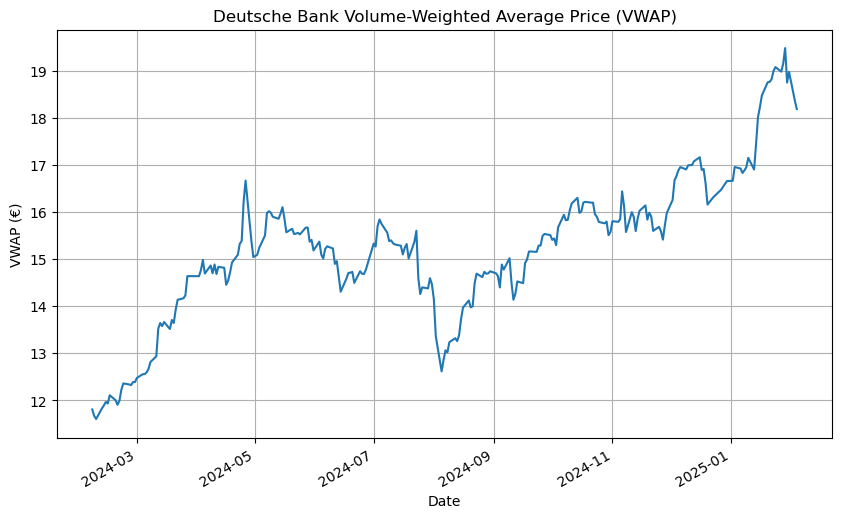

In [33]:
import matplotlib.pyplot as plt

# Check if VWAP exists and is not empty
if 'VWAP' in df.columns and not df['VWAP'].isna().all():
    # Plot VWAP
    df['VWAP'].plot(kind='line', figsize=(10, 6), title="Deutsche Bank Volume-Weighted Average Price (VWAP)")
    plt.xlabel("Date")
    plt.ylabel("VWAP (€)")
    plt.grid()
    plt.show()
else:
    print("VWAP data is not available or empty.")


Data fetched successfully!


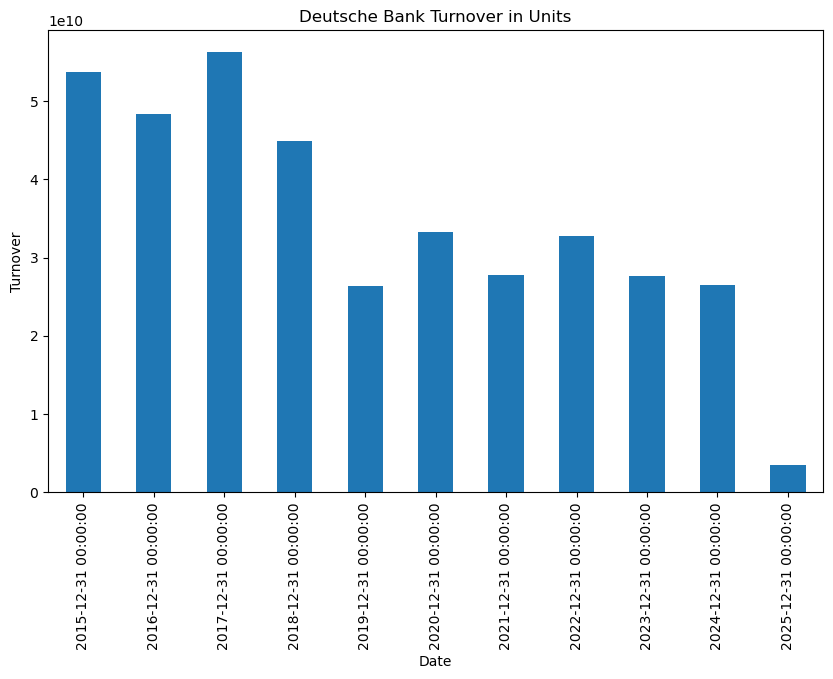

In [49]:
# Define date range
end_date = datetime.now()
start_date = end_date - timedelta(days=365)

# Fetch historical data
df = rd.get_history(
    universe='DBKGn.DE',
    fields=['TRNOVR_UNS'],  # Focus on Turnover in Units
#     start=start_date.strftime('%Y-%m-%d'),
#     end=end_date.strftime('%Y-%m-%d'),
     start=start_date.strftime('%2015-%01-%01'),
    end=end_date.strftime('%2025-%02-%01'),
    interval='1Y'
)

# Plot Turnover if data is available
if not df.empty:
    print("Data fetched successfully!")
    df['TRNOVR_UNS'].plot(kind='bar', figsize=(10, 6), title="Deutsche Bank Turnover in Units")
    plt.xlabel("Date")
    plt.ylabel("Turnover")
    plt.show()
else:
    print("No data returned.")

# Close session
rd.close_session()
